In [1]:
# !pip install keras

In [3]:
# !pip install tensorflow

In [191]:
# !pip install pydot

In [193]:
# !pip install graphviz 

# 0. Import Packages

In [188]:
from tensorflow import keras
from tensorflow.keras import layers

In [229]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.colors import LinearSegmentedColormap

from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [102]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [169]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 1. Data Exploration

In [91]:
np.random.seed(84)
train_df = pd.read_csv("USCensusTraining.csv")
test_df = pd.read_csv("USCensusTest.csv")

In [221]:
train_df.sample(5)

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
13177,20,?,58740,Some-college,10,Never-married,?,Own-child,White,Male,0,0,15,United-States,<=50K.
11719,32,Private,194981,HS-grad,9,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,36,United-States,<=50K.
17479,19,Private,501144,Some-college,10,Never-married,Sales,Other-relative,Black,Female,0,0,40,United-States,<=50K.
13132,50,Local-gov,168672,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,40,United-States,>50K.
3036,71,Local-gov,365996,Bachelors,13,Widowed,Prof-specialty,Unmarried,White,Female,0,0,6,United-States,<=50K.


In [7]:
train_df.shape

(25000, 15)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [27]:
# check fields with ? values
null_dict = dict()
for col in train_df.columns:
    if '?' in train_df[col].value_counts().index:
        null_dict[col] = train_df[col].value_counts()['?']
null_dict

{'workclass': 1399, 'occupation': 1404, 'native-country': 445}

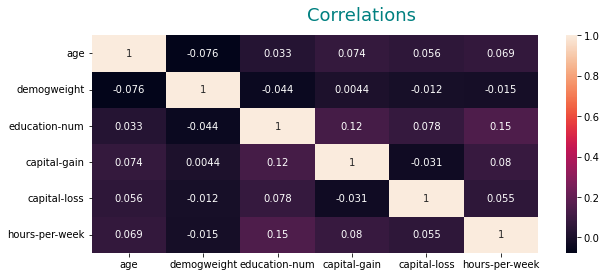

In [16]:
# Check correlations
plt.figure(figsize=(10, 4))
plt.suptitle('Correlations', fontsize = 18, color= 'teal')
corr = pd.DataFrame(train_df).corr()
sns.heatmap(corr, annot=True)
plt.show()

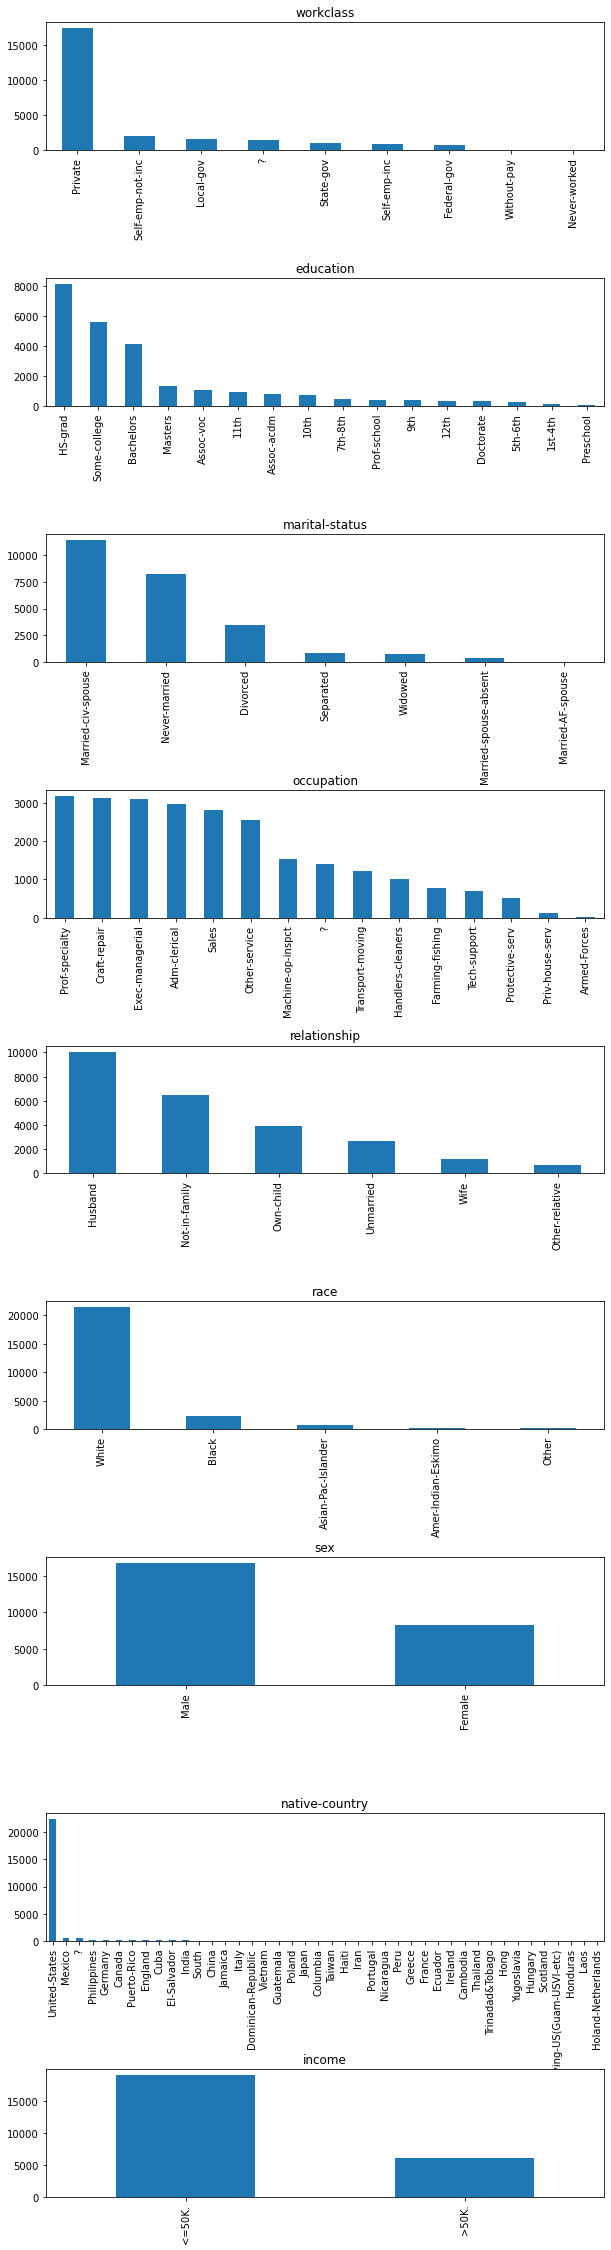

In [73]:
# plot value counts of each categorical column
obj_col_list = ['workclass', 'education', 'marital-status', 'occupation', 
          'relationship', 'race', 'sex', 'native-country', 'income']

fig, axs = plt.subplots(len(obj_col_list), figsize=(10, 40))
plt.subplots_adjust(hspace=1)
for col in obj_col_list:
     [col].value_counts().plot(kind = "bar", ax=axs[obj_col_list.index(col)]).set_title(col)
fig.show()

In [231]:
train_df['native-country'].value_counts()

United-States                 22421
Mexico                          488
?                               445
Philippines                     151
Germany                         102
Canada                           99
Puerto-Rico                      96
England                          72
Cuba                             72
El-Salvador                      72
India                            67
South                            64
China                            60
Jamaica                          58
Italy                            55
Dominican-Republic               54
Vietnam                          50
Guatemala                        50
Poland                           49
Japan                            48
Columbia                         45
Taiwan                           42
Haiti                            38
Iran                             35
Portugal                         28
Nicaragua                        25
Peru                             23
Greece                      

In [226]:
# Prepare for Crosstab
train_crosstab_df = train_df.copy(deep=True)
train_crosstab_df['income'] = train_crosstab_df['income'] == '>50K.'
train_crosstab_df.head(5)

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False


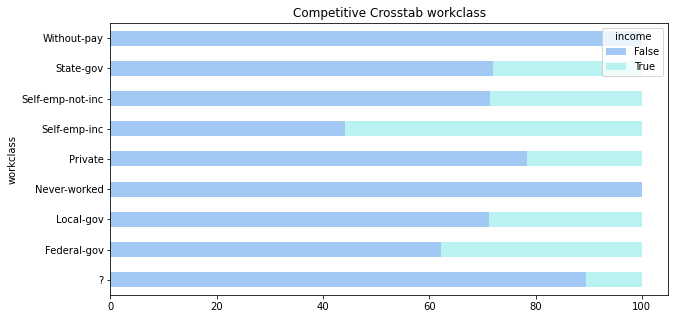

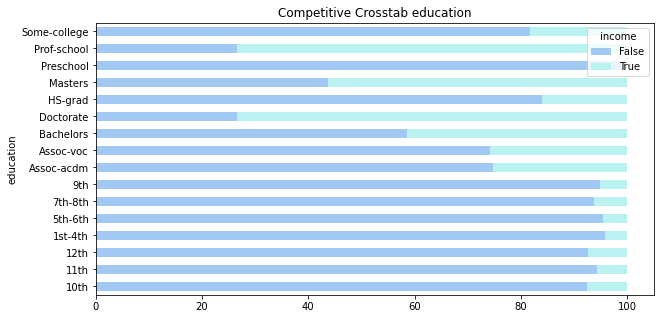

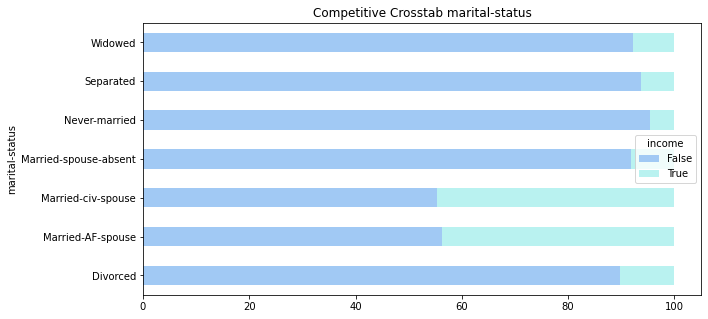

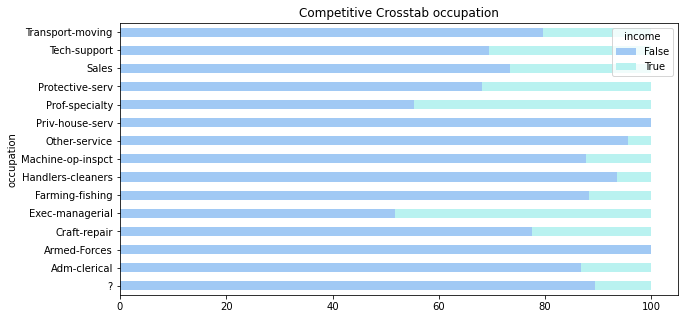

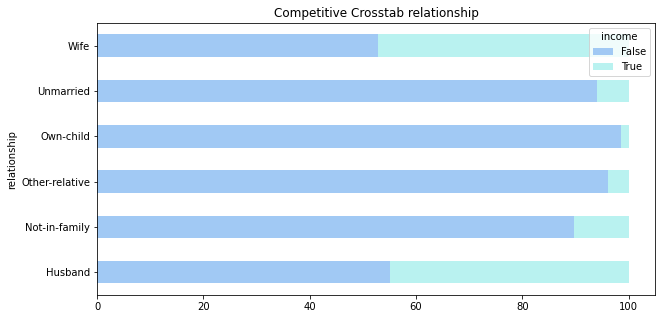

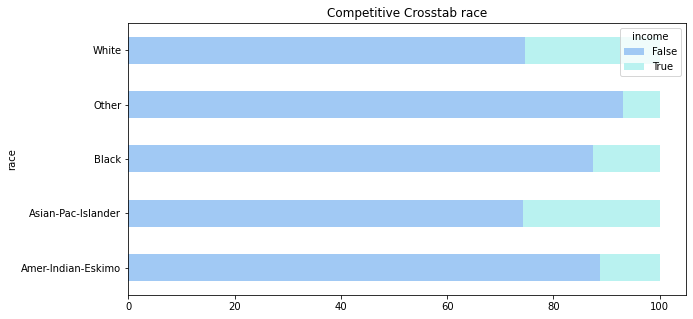

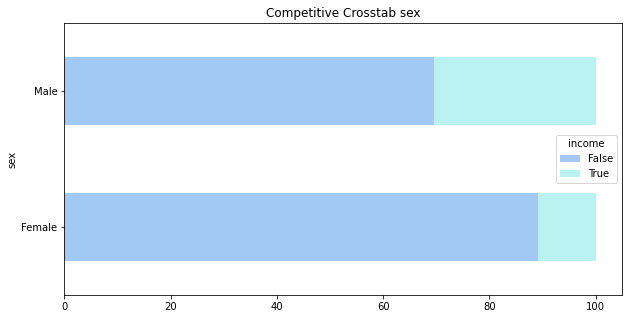

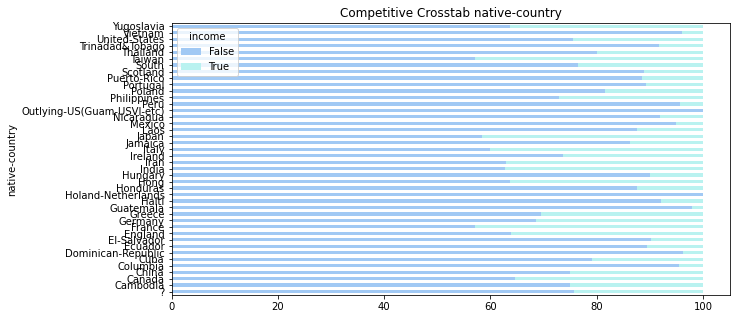

In [230]:
# Crosstab
plt.rcParams.update({'figure.max_open_warning': 0})
data = train_crosstab_df[['workclass', 'education', 'marital-status', 'occupation', 
          'relationship', 'race', 'sex', 'native-country','income']]
            
for column in data.columns:
    if column != 'income':
        results = pd.crosstab(data['income'], data[column])
        results = results.transpose()
        results_normalized = results.div(results.sum(axis = 1), axis = 0) * 100
        
        colours = sns.color_palette('pastel', n_colors=10)
        cmap1 = LinearSegmentedColormap.from_list("my_colormap", colours)
        
        ax = results_normalized.plot(kind = 'barh', stacked = True, figsize = (10,5), colormap = cmap1)
        ax.set_title('Competitive Crosstab ' + column)    

# 2. Pre-Processing the Data

In [110]:
# num_col_list = ['age',
#              'demogweight',
#              'education-num',
#              'capital-gain',
#              'capital-loss',
#              'hours-per-week']

In [83]:
# # obj_col_list.remove('income')
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(train_df[obj_col_list]).toarray())
# enc_df.columns = enc.get_feature_names_out(obj_col_list)
# joined_df = train_df.loc[:,~train_df.columns.isin(obj_col_list)].join(enc_df)

In [111]:
# obj_col_list.remove('income')
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(train_df[obj_col_list]).toarray())
enc_df.columns = enc.get_feature_names_out(obj_col_list)

In [114]:
# drop income_<50K. column
enc_df.drop(enc_df.columns[len(enc_df.columns)-2], axis=1, inplace=True)

In [115]:
enc_df.head(10)

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [116]:
# standardize the training dataset with StandardScaler
scaler = StandardScaler().fit(train_df.loc[:,~train_df.columns.isin(obj_col_list)])
scaled_train_df = scaler.transform(train_df.loc[:,~train_df.columns.isin(obj_col_list)])
joined_df = pd.DataFrame(scaled_train_df).join(enc_df)
joined_df.head(5)

,0,1,2,3,4,5,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K.
0,0.028718,-1.065847,1.141407,0.144984,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.832371,-1.010810,1.141407,-0.145406,-0.215579,-2.228425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.044341,0.246021,-0.422936,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.051550,0.427182,-1.205107,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.774935,1.411943,1.141407,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
joined_array = joined_df.to_numpy()

In [98]:
# # standardize the training dataset with StandardScaler
# scaler = StandardScaler().fit(joined_df)
# scaled_train_df = scaler.transform(joined_df)
# pd.DataFrame(scaled_train_df).head(5)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.028718,-1.065847,1.141407,0.144984,-0.215579,-0.033128,-0.243469,-0.175863,-0.263577,-0.014144,...,-0.062087,-0.018977,-0.050661,-0.041022,-0.024502,-0.021914,0.339155,-0.044766,-0.020981,-0.560966
1,0.832371,-1.010810,1.141407,-0.145406,-0.215579,-2.228425,-0.243469,-0.175863,-0.263577,-0.014144,...,-0.062087,-0.018977,-0.050661,-0.041022,-0.024502,-0.021914,0.339155,-0.044766,-0.020981,-0.560966
2,-0.044341,0.246021,-0.422936,-0.145406,-0.215579,-0.033128,-0.243469,-0.175863,-0.263577,-0.014144,...,-0.062087,-0.018977,-0.050661,-0.041022,-0.024502,-0.021914,0.339155,-0.044766,-0.020981,-0.560966
3,1.051550,0.427182,-1.205107,-0.145406,-0.215579,-0.033128,-0.243469,-0.175863,-0.263577,-0.014144,...,-0.062087,-0.018977,-0.050661,-0.041022,-0.024502,-0.021914,0.339155,-0.044766,-0.020981,-0.560966
4,-0.774935,1.411943,1.141407,-0.145406,-0.215579,-0.033128,-0.243469,-0.175863,-0.263577,-0.014144,...,-0.062087,-0.018977,-0.050661,-0.041022,-0.024502,-0.021914,-2.948505,-0.044766,-0.020981,-0.560966


In [121]:
pd.DataFrame(joined_array).describe()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
count,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-1.896572e-16,-9.537260e-17,-2.096989e-16,1.070988e-16,1.408302e-15,2.163247e-16,0.055960,0.030000,0.06496,0.000200,...,0.00384,0.000360,0.002560,0.001680,0.000600,0.000480,0.896840,0.002000,0.000440,0.239360
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.229849,0.170591,0.24646,0.014141,...,0.06185,0.018971,0.050533,0.040954,0.024488,0.021904,0.304174,0.044678,0.020972,0.426701
min,-1.578588e+00,-1.685368e+00,-3.551622e+00,-1.454062e-01,-2.155785e-01,-3.204112e+00,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.749351e-01,-6.817081e-01,-4.229358e-01,-1.454062e-01,-2.155785e-01,-3.312784e-02,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-1.174006e-01,-1.081637e-01,-3.185002e-02,-1.454062e-01,-2.155785e-01,-3.312784e-02,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.862527e-01,4.475067e-01,7.503215e-01,-1.454062e-01,-2.155785e-01,3.734086e-01,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.754747e+00,1.229871e+01,2.314664e+00,1.321189e+01,1.064062e+01,4.764002e+00,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Model Building

## 3.1 Base Model

In [125]:
# Split the dataset to X and response
X = joined_array[:,:-1]
y = joined_array[:,-1]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17500, 108), (7500, 108), (17500,), (7500,))

In [157]:
# Function that creates the model
def create_model(neurons=1, optimizer='rmsprop', batch_size=None, kernel_initializer = 'uniform', activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=108, kernel_initializer=kernel_initializer, 
                    activation=activation))
    model.add(Dense(1, kernel_initializer=kernel_initializer, 
                    activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy']) 
    return model

In [158]:
# hyperparameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
neurons = [1, 5, 10, 15, 20, 25, 30]

In [159]:
# instantiate KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=100, 
                        batch_size=10, verbose=1)

In [160]:
# Create a base model that only varies the number of neurons. Use cross-validation to find the optimal neuron #. 
neurons = neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)

# Grid search with 5-fold CV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

In [161]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/100
1750/1750 [==============================] - 1s 545us/step - loss: 0.3470 - accuracy: 0.8377
Epoch 2/100
1750/1750 [==============================] - 1s 532us/step - loss: 0.3203 - accuracy: 0.8518
Epoch 3/100
1750/1750 [==============================] - 1s 526us/step - loss: 0.3168 - accuracy: 0.8522
Epoch 4/100
1750/1750 [==============================] - 1s 528us/step - loss: 0.3145 - accuracy: 0.8550
Epoch 5/100
1750/1750 [==============================] - 1s 540us/step - loss: 0.3128 - accuracy: 0.8555
Epoch 6/100
1750/1750 [==============================] - 1s 539us/step - loss: 0.3121 - accuracy: 0.8563
Epoch 7/100
1750/1750 [==============================] - 1s 530us/step - loss: 0.3116 - accuracy: 0.8555
Epoch 8/100
1750/1750 [==============================] - 1s 530us/step - loss: 0.3116 - accuracy: 0.8559
Epoch 9/100
1750/1750 [==============================] - 1s 534us/step - loss: 0.3103 - accuracy: 0.8571
Epoch 10/100
1750/1750 [==============================]

In [204]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
grid_result.cv_results_

Best: 0.855771 using {'neurons': 30}


{'mean_fit_time': array([171.86126003, 172.98742771, 180.47576151, 169.85323486,
        177.07133651, 123.04091458, 121.66162972]),
 'std_fit_time': array([13.60419834, 11.25967479, 12.48746906, 10.94625589, 27.68853446,
         1.36176147,  0.67704953]),
 'mean_score_time': array([1.17881284, 1.04519782, 0.79858613, 0.80599251, 0.68028445,
        0.3744216 , 0.31246805]),
 'std_score_time': array([0.59342326, 0.3700427 , 0.13178529, 0.18032964, 0.14913859,
        0.0425422 , 0.03956824]),
 'param_neurons': masked_array(data=[1, 5, 10, 15, 20, 25, 30],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'neurons': 1},
  {'neurons': 5},
  {'neurons': 10},
  {'neurons': 15},
  {'neurons': 20},
  {'neurons': 25},
  {'neurons': 30}],
 'split0_test_score': array([0.84942859, 0.8545714 , 0.85285717, 0.85142857, 0.8545714 ,
        0.85171431, 0.85399997]),
 'split1_test_score': array([0.84885716, 0.8477143

In [205]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

0.849314 (0.003016) with {'neurons': 1}
0.852629 (0.002590) with {'neurons': 5}
0.853600 (0.003436) with {'neurons': 10}
0.854229 (0.003501) with {'neurons': 15}
0.854800 (0.003487) with {'neurons': 20}
0.854971 (0.004350) with {'neurons': 25}
0.855771 (0.003758) with {'neurons': 30}


In [212]:
neurons=grid_result.best_params_['neurons']
optimizer='rmsprop'
batch_size=None
kernel_initializer = 'uniform'
activation='relu'

model_test = Sequential()
model_test.add(Dense(neurons, input_dim=108, kernel_initializer=kernel_initializer, 
                activation=activation))
model_test.add(Dense(1, kernel_initializer=kernel_initializer, 
                activation='sigmoid'))
model_test.compile(loss='binary_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy']) 

In [213]:
model_test.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
1750/1750 [==============================] - 1s 620us/step - loss: 0.3488 - accuracy: 0.8385
Epoch 2/100
1750/1750 [==============================] - 1s 567us/step - loss: 0.3196 - accuracy: 0.8506
Epoch 3/100
1750/1750 [==============================] - 1s 579us/step - loss: 0.3163 - accuracy: 0.8538
Epoch 4/100
1750/1750 [==============================] - 1s 568us/step - loss: 0.3145 - accuracy: 0.8551
Epoch 5/100
1750/1750 [==============================] - 1s 555us/step - loss: 0.3137 - accuracy: 0.8548
Epoch 6/100
1750/1750 [==============================] - 1s 551us/step - loss: 0.3129 - accuracy: 0.8554
Epoch 7/100
1750/1750 [==============================] - 1s 535us/step - loss: 0.3120 - accuracy: 0.8562
Epoch 8/100
1750/1750 [==============================] - 1s 526us/step - loss: 0.3112 - accuracy: 0.8559
Epoch 9/100
1750/1750 [==============================] - 1s 567us/step - loss: 0.3105 - accuracy: 0.8557
Epoch 10/100
1750/1750 [==============================]

In [206]:
# keras.utils.plot_model(model_test, show_shapes=True, rankdir="LR")

In [214]:
y_pred = (model_test.predict(X_test) > 0.5).astype(int)

235/235 [==============================] - 0s 421us/step


In [215]:
len(y_pred)

7500

In [216]:
# Confusion Matrix
# TT  FN
# FT  TN
confusion_matrix(y_test, y_pred)

array([[5333,  398],
       [ 657, 1112]], dtype=int64)

In [217]:
balanced_accuracy_score(y_test, y_pred)

0.7795784315050327

In [ ]:
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [10, 50, 100]
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(batch_size=batch_size, epochs=epochs, model__neurons=neurons, model__activation=activation)

## 3.2 Model without Country

In [233]:
obj_col_wo_country_list = ['workclass',
                         'education',
                         'marital-status',
                         'occupation',
                         'relationship',
                         'race',
                         'sex',
                         'income']

In [234]:
num_col_list = ['age',
              'demogweight',
              'education-num',
              'capital-gain',
              'capital-loss',
              'hours-per-week']

In [235]:

enc_wo_country = OneHotEncoder(handle_unknown='ignore')
enc_wo_country = pd.DataFrame(enc.fit_transform(train_df[obj_col_wo_country_list]).toarray())
enc_wo_country.columns = enc.get_feature_names_out(obj_col_wo_country_list)

In [237]:
# drop income_<50K. column
enc_wo_country.drop(enc_wo_country.columns[len(enc_wo_country.columns)-2], axis=1, inplace=True)

In [239]:
# standardize the training dataset with StandardScaler
scaler_wo_country = StandardScaler().fit(train_df.loc[:,num_col_list])
scaled_train_wo_country_df = scaler_wo_country.transform(train_df.loc[:,num_col_list])
joined_wo_country_df = pd.DataFrame(scaled_train_wo_country_df).join(enc_wo_country)
joined_wo_country_df.head(5)

,0,1,2,3,4,5,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_>50K.
0,0.028718,-1.065847,1.141407,0.144984,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.832371,-1.010810,1.141407,-0.145406,-0.215579,-2.228425,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.044341,0.246021,-0.422936,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.051550,0.427182,-1.205107,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.774935,1.411943,1.141407,-0.145406,-0.215579,-0.033128,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [249]:
joined_wo_country_array = joined_wo_country_df.to_numpy()

In [250]:
# Split the dataset to X and response
X_wo_country = joined_wo_country_array[:,:-1]
y_wo_country = joined_wo_country_array[:,-1]

In [251]:
X_train_wo_country, X_test_wo_country, y_train_wo_country, y_test_wo_country = train_test_split(X_wo_country, y_wo_country, test_size = 0.3)
X_train_wo_country.shape, X_test_wo_country.shape, y_train_wo_country.shape, y_test_wo_country.shape

((17500, 66), (7500, 66), (17500,), (7500,))

In [252]:
# Function that creates the model
def create_model_wo_country(neurons=1, optimizer='rmsprop', batch_size=None, kernel_initializer = 'uniform', activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=66, kernel_initializer=kernel_initializer, 
                    activation=activation))
    model.add(Dense(1, kernel_initializer=kernel_initializer, 
                    activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, 
                  metrics=['accuracy']) 
    return model

In [253]:
# instantiate KerasClassifier
model_wo_country = KerasClassifier(build_fn=create_model_wo_country, epochs=100, 
                        batch_size=10, verbose=1)

In [254]:
# Create a base model that only varies the number of neurons. Use cross-validation to find the optimal neuron #. 
neurons = neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid_wo_country = dict(neurons=neurons)

# Grid search with 5-fold CV
grid_wo_country = GridSearchCV(estimator=model_wo_country, param_grid=param_grid_wo_country, n_jobs=-1, cv=5)

In [255]:
grid_result_wo_country = grid_wo_country.fit(X_train_wo_country, y_train_wo_country)

Epoch 1/100
1750/1750 [==============================] - 1s 517us/step - loss: 0.3507 - accuracy: 0.8383
Epoch 2/100
1750/1750 [==============================] - 1s 514us/step - loss: 0.3242 - accuracy: 0.8481
Epoch 3/100
1750/1750 [==============================] - 1s 547us/step - loss: 0.3217 - accuracy: 0.8505
Epoch 4/100
1750/1750 [==============================] - 1s 536us/step - loss: 0.3201 - accuracy: 0.8524
Epoch 5/100
1750/1750 [==============================] - 1s 536us/step - loss: 0.3191 - accuracy: 0.8526
Epoch 6/100
1750/1750 [==============================] - 1s 548us/step - loss: 0.3185 - accuracy: 0.8536
Epoch 7/100
1750/1750 [==============================] - 1s 535us/step - loss: 0.3177 - accuracy: 0.8553
Epoch 8/100
1750/1750 [==============================] - 1s 511us/step - loss: 0.3171 - accuracy: 0.8553
Epoch 9/100
1750/1750 [==============================] - 1s 509us/step - loss: 0.3172 - accuracy: 0.8549
Epoch 10/100
1750/1750 [==============================]

In [256]:
print("Best: %f using %s" % (grid_result_wo_country.best_score_, grid_result_wo_country.best_params_))
grid_result_wo_country.cv_results_

Best: 0.854343 using {'neurons': 30}


{'mean_fit_time': array([186.81460748, 185.92664442, 190.92774143, 188.21340971,
        171.55920043, 117.36183534, 115.95652828]),
 'std_fit_time': array([ 7.31099836,  5.28058272,  4.41861369,  4.41415889, 26.37137348,
         0.84350378,  0.3556963 ]),
 'mean_score_time': array([1.02528095, 1.1513895 , 0.84782853, 0.94491167, 1.1379776 ,
        0.4305697 , 0.29485335]),
 'std_score_time': array([0.35664175, 0.22385931, 0.2690608 , 0.20399954, 0.41702517,
        0.05146955, 0.02517584]),
 'param_neurons': masked_array(data=[1, 5, 10, 15, 20, 25, 30],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'neurons': 1},
  {'neurons': 5},
  {'neurons': 10},
  {'neurons': 15},
  {'neurons': 20},
  {'neurons': 25},
  {'neurons': 30}],
 'split0_test_score': array([0.84799999, 0.84799999, 0.85371429, 0.84742856, 0.85171431,
        0.85000002, 0.84914285]),
 'split1_test_score': array([0.84828573, 0.8457142

In [257]:
means = grid_result_wo_country.cv_results_['mean_test_score']
stds = grid_result_wo_country.cv_results_['std_test_score']
params = grid_result_wo_country.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

0.849486 (0.001527) with {'neurons': 1}
0.850857 (0.004929) with {'neurons': 5}
0.853600 (0.003639) with {'neurons': 10}
0.853886 (0.005049) with {'neurons': 15}
0.853886 (0.004002) with {'neurons': 20}
0.853371 (0.004346) with {'neurons': 25}
0.854343 (0.004820) with {'neurons': 30}


In [258]:
neurons=grid_result_wo_country.best_params_['neurons']
optimizer='rmsprop'
batch_size=None
kernel_initializer = 'uniform'
activation='relu'

model_test = Sequential()
model_test.add(Dense(neurons, input_dim=66, kernel_initializer=kernel_initializer, 
                activation=activation))
model_test.add(Dense(1, kernel_initializer=kernel_initializer, 
                activation='sigmoid'))
model_test.compile(loss='binary_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy']) 

In [259]:
model_test.fit(X_train_wo_country, y_train_wo_country, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
1750/1750 [==============================] - 1s 556us/step - loss: 0.3529 - accuracy: 0.8358
Epoch 2/100
1750/1750 [==============================] - 1s 549us/step - loss: 0.3238 - accuracy: 0.8498
Epoch 3/100
1750/1750 [==============================] - 1s 561us/step - loss: 0.3207 - accuracy: 0.8521
Epoch 4/100
1750/1750 [==============================] - 1s 561us/step - loss: 0.3195 - accuracy: 0.8517
Epoch 5/100
1750/1750 [==============================] - 1s 564us/step - loss: 0.3185 - accuracy: 0.8529
Epoch 6/100
1750/1750 [==============================] - 1s 572us/step - loss: 0.3179 - accuracy: 0.8531
Epoch 7/100
1750/1750 [==============================] - 1s 549us/step - loss: 0.3173 - accuracy: 0.8539
Epoch 8/100
1750/1750 [==============================] - 1s 563us/step - loss: 0.3172 - accuracy: 0.8554
Epoch 9/100
1750/1750 [==============================] - 1s 553us/step - loss: 0.3170 - accuracy: 0.8558
Epoch 10/100
1750/1750 [==============================]

In [260]:
y_pred = (model_test.predict(X_test_wo_country) > 0.5).astype(int)

235/235 [==============================] - 0s 492us/step


In [261]:
# Confusion Matrix
# TT  FN
# FT  TN
confusion_matrix(y_test_wo_country, y_pred)

array([[5333,  404],
       [ 657, 1106]], dtype=int64)

In [263]:
balanced_accuracy_score(y_test_wo_country, y_pred)

0.7784598407942156

In [ ]:
dataset = pd.get_dummies(train, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'])

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset)
pd.DataFrame(scaled_dataset).head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = scaled_dataset[:,:109]
y = scaled_dataset[:,109]

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17500, 109), (7500, 109), (17500,), (7500,))

In [ ]:
# Find best predictors

In [ ]:
acc = []
for i in range(0,len(train.columns)):
  if train.columns[i] != 'income':
    print('Column Name: ', train.columns[i])

    cols = [col for col in train.columns if col not in train.columns[i]]
    subset = train[cols]
    
    df = pd.get_dummies(train, columns = cols)
    scaled_df = scaler.fit_transform(df)

    n_cols = scaled_df.shape[1] - 1
    X = scaled_df[:,:n_cols]
    y = scaled_df[:,n_cols]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    # What model do we want to use?

    model = Sequential()
    model.add(Dense(n_cols, input_dim = n_cols, kernel_initializer='uniform'))
    model.add(layers.Activation('relu'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    fit = model.fit(X_train, y_train, epochs = 20, shuffle = True, batch_size = 48)
    score, accuracy = model.evaluate(X_test, y_test)

    acc.append([train.columns[i], 100*np.max(fit.history['val_accuracy'])])


Column Name:  age


In [ ]:
train.head()